In [69]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt

### Inputs

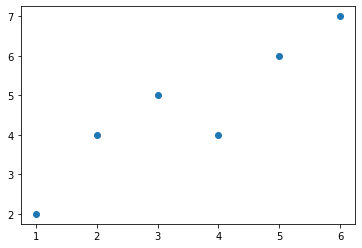

In [14]:
X = np.array([1,2,3,4,5,6])
Y = np.array([2,4,5,4,6,7])
plt.scatter(X,Y)
plt.show()

### Find slope - m intercept - b

In [66]:
def best_fit_slope_intercept(X, Y):
    m = ( ((mean(X) * mean(Y)) - mean(X*Y)) / ((mean(X) * mean(X)) - mean(X*X)) )
    b = mean(Y) - (m*mean(X))
    return m, b

In [31]:
m, b = best_fit_slope_intercept(X, Y)
print("m =", m, "b =", b)

m = 1.0 b = 1.0


### Finding the best fit line or regression line

In [63]:
regression_line = [(m*x)+b for x in X]
print(regression_line)

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


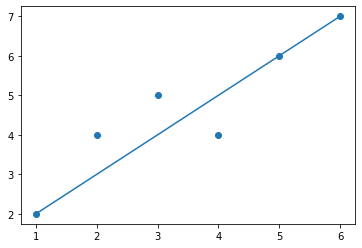

In [37]:
plt.scatter(X,Y)
plt.plot(X, regression_line) 
plt.show()

### Prediction

In [65]:
def predict(p_x):
    return ((m*p_x)+b)

In [59]:
x_p = 8
y_p = predict(x_p)
x_p,y_p

(8, 9.0)

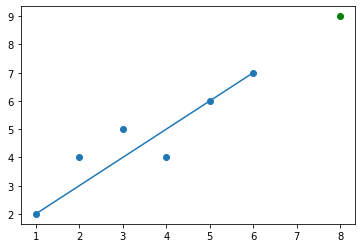

In [61]:
plt.scatter(X,Y)
plt.scatter(x_p, y_p, color='g')
plt.plot(X, regression_line)
plt.show()

### R^2 Error

In [67]:
def squared_error(y_orig, y_line):
    return sum((y_line - y_orig)**2)
def coeff_of_determination(y_orig, y_line):
    y_mean_line = [mean(y_orig) for y in y_orig]
    squared_error_regr = squared_error(y_orig, y_line)
    squared_error_y_mean = squared_error(y_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [68]:
r_squared = coeff_of_determination(y_orig= Y, y_line= regression_line)
r_squared

0.8333333333333334

### Random dataset

In [73]:
def create_dataset(hm, variance, step=2, correlation= False):
    val = 1
    Y = []
    for i in range (hm):
        y = val + random.randrange(-variance, variance)
        Y.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    X = [i for i in range(len(Y))]
    return np.array(X), np.array(Y)

In [107]:
X, Y = create_dataset(40, 1, 2, correlation='pos')
X, Y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  2,  5,  6,  9, 11, 12, 15, 16, 19, 21, 23, 24, 26, 28, 30, 33,
        34, 37, 38, 40, 42, 45, 46, 48, 51, 53, 55, 57, 58, 61, 63, 64, 67,
        69, 70, 73, 75, 76, 78]))

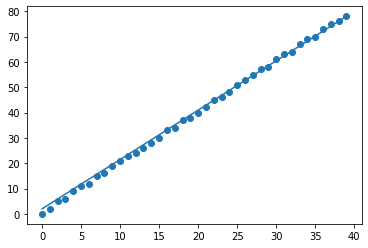

In [108]:
m, b = best_fit_slope_intercept(X, Y)
regression_line = [(m*x)+b for x in X]
plt.scatter(X,Y)
plt.plot(X, regression_line)
plt.show()

In [109]:
r_squared = coeff_of_determination(y_orig= Y, y_line= regression_line)
r_squared

0.9983219688898359